# Topics in Quantitative Finance, Summer 2023 

## Lecture 6: Brief introduction to variational and control problems
    
<br>
<br>

<center>
<font size=5, color=darkblue> Tai-Ho Wang (王 太和)</font>
</center>
<img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2016/04/MFE-Logo.jpg" align = "center" width=450>

$$
\newcommand{\cA}{\mathcal{A}}
\newcommand{\cC}{\mathcal{C}}
\newcommand{\cF}{\mathcal{F}}
\newcommand{\cG}{\mathcal{G}}
\newcommand{\E}{\mathbb{E}}
\newcommand{\P}{\mathbb{P}}
\newcommand{\R}{\mathbb{R}}
\newcommand{\Eof}[1]{\mathbb{E}\left[ #1 \right]}
\newcommand{\Pof}[1]{\mathbb{P}\left[ #1 \right]}
\newcommand{\var}[1]{{\rm Var}\left( #1 \right)}
\newcommand{\p}{\partial}
\newcommand{\tr}{\mbox{tr}}
\newcommand{\euro}{€}
\newcommand{\yen}{¥}
\newcommand{\argmax}{\mbox{argmax}}
\newcommand{\argmin}{\mbox{argmin}}
\newcommand{\1}[1]{\mathbb{1}_{\left\{ #1 \right\}}}
\newcommand{\mbA}{\mathbf A}
\newcommand{\mbB}{\mathbf B}
\newcommand{\mbP}{\mathbf P}
\newcommand{\mbQ}{\mathbf Q}
\newcommand{\mbR}{\mathbf R}
\newcommand{\mbS}{\mathbf S}
\newcommand{\bA}{\boldsymbol A}
\newcommand{\bB}{\boldsymbol B}
\newcommand{\bP}{\boldsymbol P}
\newcommand{\bp}{\boldsymbol p}
\newcommand{\bu}{\boldsymbol u}
\newcommand{\bW}{\boldsymbol W}
\newcommand{\bX}{\boldsymbol X}
\newcommand{\bx}{\boldsymbol x}
\newcommand{\bSigma}{\boldsymbol \Sigma}
$$

## Agenda
- Variational problem
- Euler-Lagrange equation
- Control problem
- Bellman's dynamical programming principle
    - Hamilton-Jacobi-Bellman (HJB) equation
- Merton's portfolio problem
    - Illustration by simulation
- Linear-quadratic (LQ) problem
- Matrix Riccati equation and its solution
- Appendix (Optional)
    - Pontryagin's maximum principle

## What is a variational problem?

Let $L = L(t, x, \dot x)$ be the (rate) of running cost/reward at time $t$, state $x$, and velocity $\dot x$. The total cost/reward functional of the path $x_t$ (assumed differentiable) for  $0 \leq t \leq T$, denoted by $R[x_t]$, is given by

$$
R[x_t] := \int_0^T L(t, x_t, \dot x_t) dt,
$$

where $L$ is also referred to as the *Lagrangian* of the variational problem. 

The goal of a variational problem is to determine a path $x_t$, for $0 \leq t \leq T$, among a class $\cC$ of functions that minimizes/maximizes the total cost/reward. Precisely, 

$$
x^* = \mathop{\argmax/\argmin}_{x \in \cC} \int_0^T L(t, x_t, \dot x_t) dt,
$$

where $\cC$ is the class of functions under consideration. 

## First order criterion

Suppose that the optimal path $x_t$ maximizes the reward functional

$$
R[x]=\int_0^T\,L(t,x_t,\dot x_t)\,dt
$$ 

with boundary conditions $x_0 = a$, $x_T = b$. 

Let $\varphi$ be a perturbation with $\varphi(0)=\varphi(T)=0$, due to the boundary conditions satisfied by the paths.
The first order criterion for optimal path (should there exists one) reads

$$\left.\frac{d}{d\epsilon}\right|_{\epsilon=0}R[x+\epsilon\,\varphi,\dot x + \epsilon\,\dot \varphi]=0.$$

## Euler-Lagrange equation

Computing this derivative explicitly (suppressing explicit dependence on
$t$),

\begin{eqnarray*}
&& \left.\frac{d}{d\epsilon}\right|_{\epsilon=0}R[x + \epsilon \varphi, \dot x + \epsilon \dot\varphi] \\
&=& \int_0^T\,\left\{\frac{\partial L}{\partial x}\,\varphi+\frac{\partial L}{\partial\dot x}\,\dot \varphi\right\}\,dt \\
&=& \int_0^T\,\left\{\frac{\partial L}{\partial x}\,\varphi - \int_0^T \frac{d}{dt}\frac{\partial L}{\partial\dot x}\, \varphi\right\}\,dt + \left.\frac{\partial L}{\partial\dot x}\,\varphi\right|_{t=0}^T  \quad (\mbox{by applying integration by partys}) \\
&=& \int_0^T\,\left\{\frac{\partial L}{\partial x}-\frac{\partial}{\partial t}\frac{\partial L}{\partial\dot x}\right\}\,\varphi\,dt \quad (\mbox{since } \varphi(0) = \varphi(T) = 0)
\end{eqnarray*}

Since this must hold for any perturbation $\varphi$ with
$\varphi(0)=\varphi(T)=0$, we deduce


> <font color="blue">The Euler-Lagrange equation </font>
$$
\frac{d}{d t}\,\left(\frac{\partial L}{\partial {\dot x} }\right)-\frac{\partial L}{\partial {x} } = 0
$$
    with boundary conditions $x_0 = a$ and $x_T = b$.
    
#### Note
- Boundary conditions may vary with the setting of the problem, as we shall see in the example that follows.
- We need the second variation to verify if a solution the Euler-Lagrange is truely optimal.  

## Example 

Consider the problem of finding a curve from a given point to a given straight line
that has minimum length. Without loss of generality, on the $xy$ plane we may assume the given straight line is the horizontal line $y = T$ for some $T > 0$ and the given point is the origin.

Let's parametrize the curve from origin to the line $y = T$ as $(x,y) = (x_t, t)$, for $0 \leq t \leq T$. Thus, the problem can be recast as a variational problem as 

$$
\min_{x_t} D[\dot x_t] =  \min_{x_t} \int_0^T \sqrt{1 + \dot x_t^2} dt
$$

with $x_0 = 0$. Note that there is no constraint on the terminal value $x_T$ and by construction the terminal point always lands on the line $y = T$. We derive the first order criterion for the optimal path as follows. Let $L(\dot x) = \sqrt{1 + \dot x^2}$ and $\varphi$ be a perturbation with $\varphi(0) = 0$. Then

\begin{eqnarray*}
\left.\frac{d}{d\epsilon}\right|_{\epsilon=0}D 
&=& \int_0^T \, \left.\frac{d}{d\epsilon}\right|_{\epsilon=0} \left\{L(\dot x_t + \epsilon \dot\varphi_t)\right\}\,dt\\
&=& \int_0^T\,\left\{ \frac{\partial L}{\partial\dot x}\,\dot \varphi\right\} \, dt \\
&=& - \int_0^T \, \frac{d}{dt}\frac{\partial L}{\partial\dot x}\, \varphi \,dt + \left.\frac{\partial L}{\partial\dot x}\,\varphi\right|_{t=0}^T  \quad (\mbox{by applying integration by partys}) \\
&=& -\int_0^T \, \frac{d}{d t}\frac{\partial L}{\partial\dot x} \, \varphi \, dt + \left.  \frac{\partial L}{\partial\dot x} \right|_T \varphi(T) \quad (\mbox{since } \varphi(0) = 0)
\end{eqnarray*}

Note that we have

\begin{eqnarray*}
&& \frac{\partial L}{\partial\dot x} = \frac{\dot x_t}{\sqrt{1 + \dot x_t^2}}, \\
&& \frac{d}{dt} \frac{\partial L}{\partial\dot x}
= \frac{d}{dt}\left(\frac{\dot x_t}{\sqrt{1 + \dot x_t^2}} \right)
= \frac{\ddot x_t}{(1 + \dot x_t^2)^{3/2}}.
\end{eqnarray*}

Since the first order criterion holds for *any* perturbation $\varphi$, it follows that 

\begin{eqnarray*}
&& \frac{d}{d t}\frac{\partial L}{\partial\dot x} = \frac{\ddot x_t}{(1 + \dot x_t^2)^{3/2}} = 0, \\
&& \left.  \frac{\partial L}{\partial\dot x} \right|_{\dot x = \dot x_T} = \frac{\dot x_T}{\sqrt{1 + \dot x_T^2}} = 0.
\end{eqnarray*}

As a result, the optimal path $x_t$ must satisfy the second order ODE

$$
\ddot x_t = 0
$$

with boundary conditions $x_0 = 0$ and $\dot x_T = 0$. The solution is unsurprsingly given by $x_t = 0$ for $0 \leq t \leq T$.

## Optimal control theory

Quotes from this [Wikipage](https://en.wikipedia.org/wiki/Optimal_control):

> - Optimal control theory, an extension of the calculus of variations, is a mathematical optimization method for deriving control policies. The method is largely due to the work of Lev Pontryagin and his collaborators in the Soviet Union and Richard Bellman in the United States.
>
>
> - Optimal control deals with the problem of finding a control law for a given system such that a certain optimality criterion is achieved. A control problem includes a cost functional that is a function of state and control variables. An optimal control is a set of differential equations describing the paths of the control variables that minimize the cost functional. The optimal control can be derived using Pontryagin's maximum principle (a necessary condition also known as Pontryagin's minimum principle or simply Pontryagin's Principle), or by solving the Hamilton–Jacobi–Bellman equation (a sufficient condition).


## Richard Ernest Bellman 

<h2><img src="https://upload.wikimedia.org/wikipedia/en/7/7a/Richard_Ernest_Bellman.jpg" align = "center" width=200></h2>

Courtesy: Photos from the [Wikipage](https://en.wikipedia.org/wiki/Richard_E._Bellman)

## Лев Семёнович Понтря́гин

<h2><img src="https://upload.wikimedia.org/wikipedia/commons/3/39/Lev_Pontrjagin.jpg" align = "center" width=200></h2>

Courtesy: Photo from the [Wikipage](https://en.wikipedia.org/wiki/Lev_Pontryagin)

## What is a control problem?

A control problem consists of

- State variables
- Control variables
- Set of admissible controls
- Performance criterion
- Objective functional

A control problem is *stochastic* if the state variables are driven by stochastic processes; otherwise, it is *deterministic*. 

Performance criterion usually consists of a running cost/reward and a terminal cost/reward.

The goal of a control problem is to determine control policies, also called *optimal controls*, among all adimssible policies that maximize or minimize the objective functional.

A control problem can be of finite or infinite horizon. A discount factor is usually required for an infinite horizon control problem as finiteness/well-definedness of the objective functional is concerned. 

The *value function* of a control problem is the optimal value of the objective functional when the controled system is in a specific state at a certain time. 

A control problem is called *Markovian* if the state variables follow a Markov process. 

One of key ingredients in solving control problems is the *Bellman's principle*, also knowns as the *dynamic programming principle* satisfied by the value function.  

## Stochastic control problem

Consider the following stochastic control problem aiming at minimizing expected costs among all admissible controls.

$$
  \min_{v\in\mathcal G[0,T]} \E\left[g(X^{(v)}_T) + \int_0^T h(s,X^{(v)}_s,v_s) ds \right],
$$

where
* $\mathcal G[0,T]$ is the collection of admissible controls in the time interval $[0,T]$ 
* the state variable $X^{(v)}_t$ is driven by the controlled SDE
    $$
      dX^{(v)}_t = \mu( t,X^{(v)}_t, v_t) dt + \sigma(t,X^{(v)}_t, v_t) dW_t.
    $$
* $g(X^{(v)}_T) + \int_0^T h(s,X^{(v)}_s,v_s) ds$ is the performance criterion for policy $v \in \cG[0, T]$
* $g$ is referred to as the *terminal cost* and $h$ is the *running cost*


#### Note
The problem reduces to a deterministic control problem if $\sigma \equiv 0$.

## Bellman’s principle of optimality

> An optimal policy has the property that whatever the initial state and
initial decision are, the remaining decisions must constitute an optimal
policy with regard to the state resulting from the first decision.

(See Bellman, 1957, Chap. III.3.)

## Value function 

* For a given admissible control $v\in\mathcal G[t,T]$, define the objective functional $J^{(v)}$ as
    
    $$
      J^{(v)}(t,x) = \E\left[\left. g(X^{(v)}_T) + \int_t^T h(s,X^{(v)}_s,v_s) ds \right| X_t = x \right].
    $$


* The *value function* $J(t,x)$ for a stochastic control problem is defined as

    $$
      J(t,x) = \min_{v\in\mathcal G[t,T]} J^{(v)}(t,x).
    $$


* The value function $J$ at $(t,x)$ is the optimal value of the control problem conditioned on the process starting at $(t,x)$ and applying the optimal control thereafter.

## Bellman's principle again

The Bellman's principle can be rephrased in terms of value function as follow. For any $0 < \epsilon < T -t$,

$$
J(t,x) = \min_{v\in\mathcal G[t,t+\epsilon]} \E\left[\left. \int_t^{t+\epsilon} h(s,X^{(v)}_s,v_s) ds + J(t+\epsilon,X^{(v)}_{t+\epsilon}) \right| \cF_t \right].
$$


## The Hamilton-Jacobi-Bellman (HJB) equation

The value function $J$ satisfies the terminal value problem

$$
\p_t J(t,x) + \min_{v\in\mathcal G[t]} \{\mathcal L^{(v)} J(t,x) + h(t,x,v) \} = 0, \mbox{ for } t < T
$$

with terminal condition

$$
  J(T,x) = g(x),
$$

where $\mathcal L^{(v)} := \frac{\sigma^2}2 \p_x^2 + \mu \p_x$ is the associated infinitesimal generator of the controlled process 

$$
dX^{(v)}_t = \mu( t,X^{(v)}_t, v_t) dt + \sigma(t,X^{(v)}_t, v_t) dW_t.
$$

#### Note

* The HJB equation is bascially an infinitesimal version of the Bellman's principle. 
* The optimal policy (control) is given implicitly in terms of the value function $J$.
* We shall need to verify that the solution to HJB equation is indeed the value function for the control problem. This process is usually referred to as *proving the verification theorem*. 

## Stochastic control problem in discrete time - finite horizon 

- state variable $X_t$
- admissible control $u_t \in \cA$
- running cost: $h(t, x, u)$
- terminal cost: $g(x)$

Performance criterion

$$
g(X_T^{(u)}) + \sum_{t=0}^{T-1} h(t, X_t^{(u)}, u_t)
$$


Objective function 

$$
\Eof{g(X_T^{(u)}) + \sum_{t=0}^{T-1} h(t, X_t^{(u)}, u_t)}
$$

Value function 

$$
V(t,x) = \inf_{u\in\cA[t, T]} \E_{t,x}\left[g(X^{(u)}_T) + \sum_{s=t}^{T-1} h(s, X^{(u)}_s, u_s)\right]
$$

$Q$-function. For $a \in \cA[t, t+1]$ and $t < T$,

$$
Q(t,x, a) = h(t, x, a) + \E_{t, x}\left[V(t+1, X_{t+1}^{(a)})\right]
$$

and 

$$
Q(T, x, a) = g(x).
$$


## Dynamical programming principle (DPP)

For $0 \leq t < T$, the value function $V(t, x)$ satisfies the following Bellman's dynamical programming principle

$$
V(t, x) = \inf_{u\in\cA[t, t+1]} \left\{h(t, x, u) + \E_{t, x}\left[ V(t+1, X^{(u)}_{t+1})\right]\right\}
$$ 

with terminal condition $V(T, x) = g(x)$. Note that DPP implies 
$$
V(t, x) = \inf_{a\in\cA[t, t+1]} Q(t, x, a).
$$

Hence, we also have the DPP for $Q$-function for $0 \leq t < T$ as

$$
Q(t,x, a) = h(t, x, a) + \E_{t, x}\left[\inf_{b\in\cA[t+1, t+2]}Q(t+1, X_{t+1}^{(a)}, b)\right].
$$

## Backward induction 

In discrete time setting, we can evaluate the value functions by backward induction. 

\begin{eqnarray*}
V(T - 1, x) &=& \inf_{u\in\cA[T-1, T]} \E_{T-1, x}\left[h(T-1, x, u) + V(T, X^{(u)}_T)\right] \\
&=& \inf_{u\in\cA[T-1, T]} \E_{T-1, x}\left[h(T-1, x, u) + g(X^{(u)}_T)\right]
\end{eqnarray*}

Thus,

\begin{eqnarray*}
V(T - 2, x) &=& \inf_{u\in\cA[T-2, T-1]} \E_{T-2, x}\left[h(T-2, x, u) + V(T-1, X^{(u)}_T)\right] 
\end{eqnarray*}

and so on and so forth ...


## Stochastic control problem - infinite horizon 

- running cost: $h(x, u)$
- discount factor: $\alpha$

Objective function 

$$
\Eof{\sum_{t=0}^\infty e^{-\alpha t} \, h(X_t^{(u)}, u_t)}
$$

- value function 

$$
V(x) = \inf_{u\in\cA} \E_{x}\left[\sum_{t=0}^\infty e^{-\alpha t} h(X^{(u)}_t, u_t)\right]
$$

- Dynamical programming

$$
V(x) = e^{-\alpha} \inf_{u\in\cA[0,1]} \E_{x}\left[h(x, u) + V(X^{(u)}_1) \right]
$$

## Example 1

Consider the previous problem of finding a curve from a given point to a given straight line that has minimum length. 

We recast the problem as a (deterministic) control problem as 

$$
\min_{u} \int_0^T \sqrt{1 + u_t^2} dt
$$

subject to $dx_t = u_t dt$ and $x_0 = 0$. Let $J$ be the value function, i.e., 

$$
J(t, x) = \min_{u} \int_t^T \sqrt{1 + u_s^2} ds
$$

for $\dot x_s = u_s$ and $x_t = x$. 

The associated HJB equation for value function $J$ reads

$$
J_t + \min_u \left\{ \sqrt{1 + u^2} + u J_x \right\} = 0
$$

with terminal condition $J(T, x) = 0$. First order criterion implies that 

$$
u = \frac{J_x}{\sqrt{1 - J_x^2}}.
$$

Substituting the $u$ into the HJB equation yields

$$
J_t + \frac{1 + J_x^2}{\sqrt{1 - J_x^2}} = 0.
$$

A complicated looking equation with a very simple solution $J(t, x) = T - t$, which is independent of $x$. Thus, the optimal policy 

$$
u_t^* = \frac{J_x}{\sqrt{1 - J_x^2}} = 0 
$$ 

for all $t$.


## Example 2 - Merton's portfolio problem

Quote from the [Wikipage](https://en.wikipedia.org/wiki/Merton%27s_portfolio_problem):

> Merton's portfolio problem is a well known problem in continuous-time finance and in particular intertemporal portfolio choice. An investor must choose how much to consume and must allocate his wealth between stocks and a risk-free asset so as to maximize expected utility. The problem was formulated and solved by Robert C. Merton in 1969 both for finite lifetimes and for the infinite case. Research has continued to extend and generalize the model to include factors like transaction costs and bankruptcy.


## HARA utility

- HARA stands for *Hyperbolic Absolute Risk Aversion*.

    - The Arrow-Pratt measure of absolute risk-aversion (ARA), a.k.a., the *coefficient of absolute risk aversion*, $A$ of a utility function $U$ is defined as $A = -\frac{U''}{U'}$.
    - The reciprocal of $A$ is referred to as risk tolerance $T = \frac 1A$.
    - A utility function is said to exhibit hyperbolic absolute risk aversion if and only if the risk tolerance $T$ is a linear function:
    $$
    T(x) = \frac x{1 - \gamma} + \frac ba.
    $$
    
    - HARA utility functions have the general form 
    $$
    U(x) = \frac{1 - \gamma}\gamma \left( \frac{a x}{1 - \gamma} + b\right)^\gamma
    $$

    - HARA utility is often quoted as a power utility $U(x) = x^\gamma$, for $\gamma \in [0,1]$.

## The economy

- $M_t$: price of riskless asset

- $S_t$: price of risky assset

- $u_t$: percentage/weight of wealth invested in the risky asset at time $t$

- $W_t$: investor's wealth at time $t$

## Evolution of the assets

Let $Z_t$ be a Brownian motion.

- Riskless asset follows 

$$
dM_t = r M_t dt, \qquad M_0 = \mbox{initial amount in the money account}
$$

- Risky asset follows a geometric Brownian motion/Black-Scholes model

$$
\frac{dS_t}{S_t} = \mu dt + \sigma dZ_t
$$

- $r$, $\mu$, and $\sigma > 0$ are constants. Assume $\mu > r > 0$.

## Self-financing strategy

Let $h_t$ be the number of shares of the risky asset in the investor's porfolio and $b_t$ dollors in the riskless assets. Apparently, the investor's wealth $W_t$ at time $t$ is givevn by  

$$
W_t = h_t S_t + b_t.
$$

A trading strategy $(h_t, b_t)$ is called *self-financing* if the wealth process satisfies 

$$
dW_t = h_t dS_t + r b_t dt.
$$

## Wealth process 

Define 

$$
u_t = \frac{h_t S_t}{W_t}.
$$

We rewrite the wealth in terms of $u_t$ as 

$$
W_t = u_t W_t + (1 - u_t) W_t = \frac{u_t W_t}{S_t} S_t + (1 - u_t)W_t.
$$

The condition of self-financing implies that $W_t$ satisfies

\begin{eqnarray*}
&& dW_t = \frac{u_t W_t}{S_t} dS_t + (1 - u_t)W_t r dt
\end{eqnarray*}

or equivalently 

\begin{eqnarray*}
\frac{dW_t}{W_t} &=& u_t(\mu dt + \sigma dZ_t) + (1 - u_t) r dt \\
&=& \{r + u_t(\mu - r) \} dt + u_t \sigma dZ_t
\end{eqnarray*}

## Stochastic control problem

Merton's problem is recast as the following stochastic control problem

$$
\max_{u \in \mathcal A} \Eof{U(W_T)}
$$

where $W_t$ follows the controlled geometric Brownian motion

\begin{eqnarray*}
\frac{dW_t}{W_t} &=& \{r + u_t(\mu - r) \} dt + u_t \sigma dZ_t
\end{eqnarray*}

### Note

- $W_t$ can be written as follows.
$$
W_t = W_0 e^{rt + \int_0^t \{u_s(\mu - r) - \frac12 \sigma^2 u_s^2 \} ds + \sigma \int_0^t u_s dW_s}
$$
- $W_t \geq 0$ 

## The value function

The value function is defined as 

$$
V(t,w) = \max_{u \mathcal A[t,T]} \Eof{\left. U(W_T) \right| W_t = w}
$$

## Hamilton-Jacobi-Bellman (HJB) equation

The value function $V(t,w)$ satisfies the HJB equation

$$
V_t + \max_u \left\{ \frac{\sigma^2 u^2}2 w^2 V_{ww} + \left((\mu - r)u + r\right) w V_w \right\} = 0
$$

with terminal condition $V(T, w) = U(w)$.

### Note
For general utility function $U$, it is hard, if not impossible, to find closed form solution to the above HJB equation except the HARA utility.  

## First order criterion

Assuming $V_{ww} < 0$.

$$
u = -\frac{(\mu - r)w V_w}{\sigma^2 w^2 V_{ww}} = -\frac{(\mu - r) V_w}{\sigma^2 w V_{ww}}
$$

The HJB equation becomes 

\begin{eqnarray*}
V_t - \frac{(\mu - r)^2 V_w^2}{2\sigma^2 V_{ww}} + r w V_w = 0
\end{eqnarray*}

with terminal condition $V(T, w) = w^\gamma$.

## Ansatz

Assume the ansatz for value function $V$ 

$$
V(t,w) = a(t) w^\gamma
$$

Plug the ansatz into the HJB equation yields 

\begin{eqnarray*}
a'(t) w^\gamma + \frac{(\mu - r)^2}{2\sigma^2} \frac\gamma{1 - \gamma} a(t) w^\gamma + r \gamma a(t) w^\gamma = 0
\end{eqnarray*}

Thus, $a$ satisfies

\begin{eqnarray*}
a'(t) + \left\{\frac{(\mu - r)^2}{2\sigma^2} \frac\gamma{1 - \gamma} + r \gamma \right\} a(t) = 0
\end{eqnarray*}

with terminal condition $a(T) = 1$.

$a$ has the closed form expression

$$
a(t) = e^{\alpha(T-t)},
$$

where $\alpha = \frac{(\mu - r)^2}{2\sigma^2} \frac\gamma{1 - \gamma} + r \gamma $. Hence, the value function $V$ is given by

$$
V(t,w) = e^{\alpha(T - t)} w^\gamma. 
$$

### Note

- $V_{ww} = e^{\alpha(T - t)} \gamma (\gamma - 1) w^{\gamma - 2} < 0$ since $\gamma \in (0,1)$.

## Optimal weight - the Merton ratio

The optimal strategy $u^*$ reads

$$
u^* = \frac{\mu - r}{\sigma^2(1 - \gamma)}
$$

In other words, the optimal strategy is to maintain a constant percentage/weight $u^*$, determined by the Merton ratio, of the wealth invested in the risky asset. 

### Note
- The higher the excess return $\mu - r$ of the risky asset, the higher the weight $u^*$.

- The higher the volatility $\sigma$ of the risky asset, the lower the weight $u^*$. 

- The less risk averse the investor is, i.e., $\gamma$ is closer to 1, the higher the weight $u^*$.

## Implementation of Merton's problem in `python`

In [1]:
# As always, import required modules
import numpy as np
from numpy import sqrt, log, exp
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
from scipy.stats import norm

In [14]:
# parameters
mu, r, sigma, gamma = 0.05, 0.02, 0.3, 0.4
T = 1
n_sim, n_steps = 10_000, 1000
dt = T/n_steps

# utility 
U = lambda w: w**gamma

# optimal policy: Merton ratio
u_st = (mu - r)/sigma**2/(1 - gamma)
print(f'The Merton ratio is {u_st}.')

The Merton ratio is 0.5555555555555557.


## Create a `python` `class`

In [15]:
# value distribution
# inputs
# r, mu, sigma: risk free rate, expected return, volatility
# W0, T: initial wealth, investment horizon
# u: policy function/control
# U: utility

class ValueDistribution:
    def __init__(self, r, mu, sigma, U, u, W0=10_000, T=1, n_sim=10_000, n_steps=100):
        self.r, self.mu, self.sigma, self.T = r, mu, sigma, T
        self.W0, self.u, self.U = W0, u, U
        self.n_sim, self.n_steps = n_sim, n_steps
        dt = self.T/self.n_steps
        # initialize W
        self.W = np.ones([self.n_sim, self.n_steps+1])*self.W0
        
        # simulation 
        for i in range(self.n_steps):
            dZ = norm.rvs(size=self.n_sim)
            dZ = dZ - dZ.mean()
            dZ = dZ/dZ.std()
            dZ = dZ*np.sqrt(dt)
            drift = self.r + (self.mu - self.r)*self.u(self.W[:,i]) \
                - self.sigma**2*self.u(self.W[:,i])**2/2
            diffusion = self.u(self.W[:,i])*self.sigma 
            self.W[:,i+1] = self.W[:,i]*np.exp(drift*dt + diffusion*dZ)
        self.V = self.U(self.W[:,-1])
        self.value = self.V.mean()
        print(f'Simulated expected value under the given policy is {self.value}.')
        
    def W_hist(self):
        sns.histplot(self.W[:,-1], stat='density', bins=50, element='step', color='orange')
        plt.title('Histogram of wealth', fontsize=18);
        return None
    
    def V_hist(self):
        sns.histplot(self.V, stat='density', bins=50, element='step', color='orange')
        plt.title('Histogram of objective', fontsize=18);
        return None
    
    def sample_path(self, n_path=0.5):
        if n_path == 0.5:
            n_path = np.random.choice(self.n_sim)
        dt = self.T/self.n_steps
        t = np.arange(0, self.T+dt, dt)
        plt.plot(t, self.W[n_path,:], label=f'Sample path number {n_path}')
        plt.hlines(y=self.W0, xmin=0, xmax=t[-1], ls='dotted', color='k')
        plt.xlabel('$t$', fontsize=15)
        plt.ylabel('$W$', fontsize=15)
        plt.title('Wealth sample path', fontsize=18)
        plt.legend();
    
    def __call__(self):
        return self.value

### Policy 1

In [16]:
# policy function 
u1 = lambda w: 0.01*w**0.5

# initial wealth
W0 = 10_000

# instantiate a class
ve1 = ValueDistribution(r, mu, sigma, U, u1, W0=W0, n_steps=1000)

Simulated expected value under the given policy is 40.16591597360768.


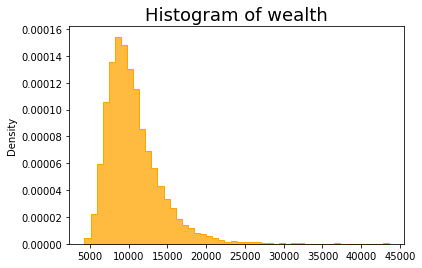

In [17]:
ve1.W_hist()

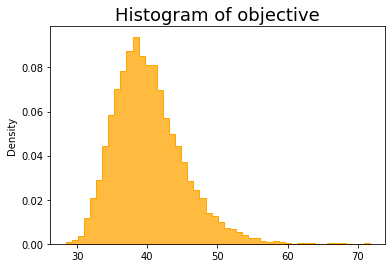

In [18]:
ve1.V_hist()

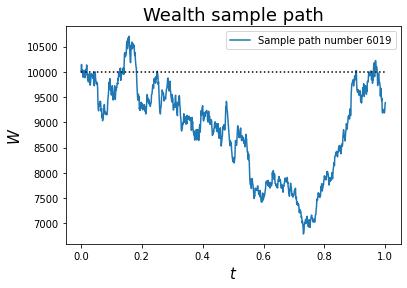

In [20]:
ve1.sample_path()

### Policy 2

In [22]:
# policy function 
u2 = lambda w: 2

# initial wealth
W0 = 10_000

# instantiate a class
ve2 = ValueDistribution(r, mu, sigma, U, u2, n_steps=1000)

Simulated expected value under the given policy is 39.366898034908544.


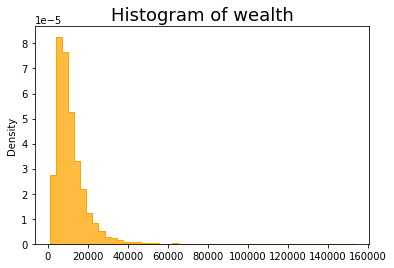

In [23]:
ve2.W_hist()

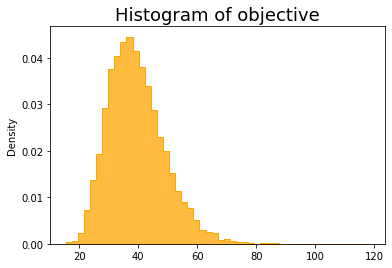

In [24]:
ve2.V_hist()

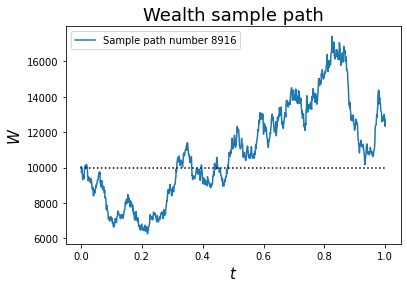

In [25]:
ve2.sample_path()

### Optimal policy, the Merton ratio

In [26]:
# Merton ratio
u_st = (mu - r)/sigma**2/(1 - gamma)
print(f'The Merton ratio is {u_st}.')

# optimal policy function 
u_opt = lambda w: u_st

# initial wealth
W0 = 10_000

# instantiate a class
ve_opt = ValueDistribution(r, mu, sigma, U, u_opt, n_steps=1000)

The Merton ratio is 0.5555555555555557.
Simulated expected value under the given policy is 40.264042194294426.


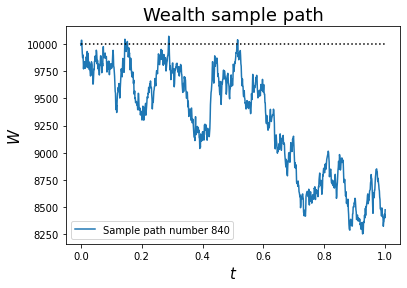

In [27]:
ve_opt.sample_path()

## Histogram of value

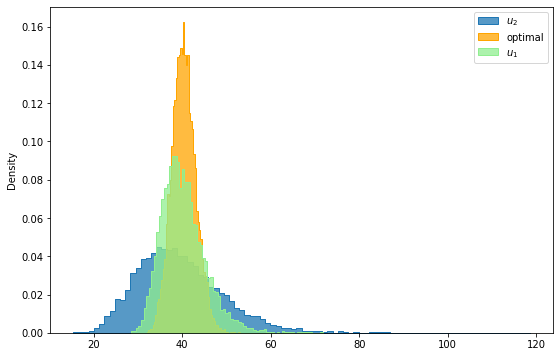

In [28]:
plt.figure(figsize=(9, 6))
sns.histplot(ve2.V, stat='density', element='step', label='$u_2$')
sns.histplot(ve_opt.V, stat='density', element='step', label='optimal', color='orange')
sns.histplot(ve1.V, stat='density', element='step', color='lightgreen', label='$u_1$')
plt.legend();

## Histogram for final wealth

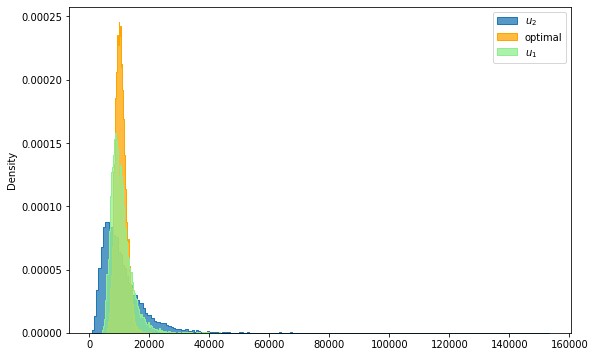

In [29]:
plt.figure(figsize=(9, 6))
sns.histplot(ve2.W[:,-1], stat='density', element='step', label='$u_2$')
sns.histplot(ve_opt.W[:,-1], stat='density', element='step', label='optimal', color='orange')
sns.histplot(ve1.W[:,-1], stat='density', element='step', color='lightgreen', label='$u_1$')
plt.legend();

## Linear-quadratic (LQ) control problem

An important class of control problems with solutions in closed form is the *LQ* problems. 
A control problem is called an LQ problem if its state variables has linear drift and performance criterion is quadratic in running and terminal rewards. Specifically, the state variables $\bX_t \in \R^d$ and control $\bu_t \in \R^\ell$ are driven by

$$
d\bX_t = (\mbA \bX_t + \mbB \bu_t) dt + \bSigma d\bW_t, 
$$

where $\bA$ is a $d\times d$ matrix, $\bB$ a $d\times\ell$ matrix, $\bSigma$ a $d\times n$ matrix, and $\bW_t$ is an $n$-dimensional Brownian motion. 
The performance criterion is given by 

$$
\bX_T' \mbP \bX_T + \int_0^T \left(\bX_t' \mbQ \bX_t + 2\bu_t' \mbS \bX_t + \bu_t' \mbR \bu_t \right) dt, 
$$

where $\mbP$, $\mbQ$ are $d\times d$ symmetric matrices, $\mbR$ an $\ell\times\ell$ symmetric positive definite matrix, and $\mbS$ an $\ell\times d$ matrix.

## HJB equation

Let $V$ be the value function

$$
V(t, \bx) = \min_{\bu} \Eof{\left. \bX_T' \mbP \bX_T + \int_t^T \left(\bX_s' \mbQ \bX_s + 2\bu_s' \mbS \bX_s + \bu_s' \mbR \bu_s \right) ds\right|\bX_t = \bx}.
$$

$V$ satisfies the following HJB equation

$$
V_t + \frac12\tr(\bSigma\bSigma'\nabla^2 V) + \min_{\bu}\left\{(\mbA \bx + \mbB \bu)' \nabla V + \bx'\mbQ\bx + 2\bu' \mbS \bx + \bu_t' \mbR \bu_t \right\} = 0 
$$

with terminal condition $V(T, \bx) = \bx'\mbP\bx$.

#### Note
- $\mbR$ is assumed positive definite. 

## First order criterion

Assume $\mbR$ is positive definite. The first order criterion implies 

$$
2 \mbR \bu + \mbB'\nabla V + 2\mbS \bx = 0.  
$$

Thus, the optimal policy is given in terms of value function by 

$$
\bu = - \frac12 \mbR^{-1} (\mbB'\nabla V + 2\mbS \bx).
$$

## HJB equation again

We have 

\begin{eqnarray*}
&& \bu' \mbB' \nabla V + \bu'\mbR\bu + 2 \bu' \mbS \bx \\
&=& -\frac12 (\nabla V' \mbB + 2\bx'\mbS')\mbR^{-1} \mbB' \nabla V + \frac14 (\nabla V' \mbB + 2\bx'\mbS') \mbR^{-1} \mbR \mbR^{-1} (\mbB'\nabla V + 2\mbS\bx) - (\nabla V'\mbB + 2 \bx'\mbS')\mbR^{-1} \mbS \bx \\
&=& -\frac14 \nabla V' \mbB \mbR^{-1} \mbB' \nabla V - \nabla V'\mbB\mbR^{-1} \mbS \bx -  \bx'\mbS' \mbR^{-1} \mbS \bx 
\end{eqnarray*}

Substituting into the HJB equation yields 

\begin{eqnarray*}
&& V_t + \frac12\tr(\bSigma\bSigma'\nabla^2 V) + \max_{\bu}\left\{(\mbA \bx + \mbB \bu)' \nabla V + \bx'\mbQ\bx + \bu'\mbR\bu + 2 \bu' \mbS \bx\right\} \\
&=& V_t + \frac12\tr(\bSigma\bSigma'\nabla^2 V) + \bx'\mbA' \nabla V + \bx'\mbQ\bx - \frac14 \nabla V' \mbB \mbR^{-1} \mbB' \nabla V - \nabla V'\mbB\mbR^{-1} \mbS \bx -  \bx'\mbS' \mbR^{-1} \mbS \bx
\end{eqnarray*}

## Ansatz

Assume the ansatz for value function $V(t, \bx) = \bx' H_1 \bx + H_0$. We have

\begin{eqnarray*}
&& V_t = \bx' \dot H_1 \bx + \dot H_0, \\
&& \nabla V = 2 H_1 \bx, \\
&& \nabla^2 V = 2 H_1.
\end{eqnarray*}

Plugging into the HJB equation implies

\begin{eqnarray*}
&& V_t + \frac12\tr(\bSigma\bSigma'\nabla^2 V) + \bx'\mbA' \nabla V + \bx'\mbQ\bx - \frac14 \nabla V' \mbB \mbR^{-1} \mbB' \nabla V - \nabla V'\mbB\mbR^{-1} \mbS \bx - \bx'\mbS' \mbR^{-1} \mbS \bx \\
&=& \bx' \dot H_1 \bx + \dot H_0 + \tr(\bSigma\bSigma'H_1) + 2 \bx' \mbA' H_1 \bx + \bx' \mbQ\bx - \bx' H_1\mbB\mbR^{-1}\mbB'H_1 \bx - 2\bx' H_1 \mbB \mbR^{-1}\mbS \bx - \bx'\mbS' \mbR^{-1}\mbS \bx \\
&=& \bx'\dot H_1 \bx + \dot H_0 + \tr(\bSigma\bSigma'H_1) + \bx' \mbA' H_1 \bx + \bx' H_1 \mbA \bx + \bx' \mbQ\bx - \bx' H_1\mbB\mbR^{-1}\mbB'H_1 \bx \\
&& - \bx' H_1 \mbB \mbR^{-1}\mbS \bx - \bx' \mbS' \mbR^{-1} \mbB' H_1\bx - \bx'\mbS' \mbR^{-1}\mbS \bx. 
\end{eqnarray*}

The optimal (feedback) control $\bu^*$ becomes

$$
\bu^* = - \frac12 \mbR^{-1} \mbB'\nabla V = - \mbR^{-1} (\mbB' H_1 + \mbS)\bx
$$

## Matrix Riccati equation

Compare the coefficients and obtain the matrix Riccati equation

\begin{eqnarray*}
&& \dot H_1 - H_1\mbB\mbR^{-1}\mbB'H_1 + (\mbA - \mbB\mbR^{-1}\mbS)' H_1 + H_1 (\mbA - \mbB\mbR^{-1}\mbS) + \mbQ - \mbS'\mbR^{-1}\mbS = 0 \\
&& \dot H_0 + \tr(\bSigma\bSigma'H_1) = 0
\end{eqnarray*}

with terminal condition $H_1(T) = \mbP$ and $H_0(T) = 0$.

## Solution to the Riccati equation

The solution to the matrix Riccati equation for $H_1$ can be obtained by 

$$
H_1 = M N^{-1}, 
$$

where $M$, $N$ satisfy the linear ODEs

$$
\frac{d}{dt} \left[\begin{array}{c} M \\ N \end{array}\right] =
\left[\begin{array}{cc} -(\mbA - \mbB\mbR^{-1}\mbS) & -\mbQ + \mbS'\mbR^{-1}\mbS \\ 
-\mbB \mbR^{-1} \mbB' & \mbA - \mbB\mbR^{-1}\mbS
\end{array}\right] \,
\left[\begin{array}{c} M \\ N \end{array}\right]
$$

with terminal conditions $M_T = H_1(T)$ and $N_T = I$.

The solution to the linear system can be written as 

$$
\left[\begin{array}{c} M \\ N\end{array}\right] =e^{-(T-t)\Psi} \,
\left[\begin{array}{c} \mbP \\ I \end{array}\right]
$$

where 

$$
\Psi = \left[\begin{array}{cc} -(\mbA - \mbB\mbR^{-1}\mbS) & -\mbQ + \mbS'\mbR^{-1}\mbS \\ 
-\mbB \mbR^{-1} \mbB' & \mbA - \mbB\mbR^{-1}\mbS
\end{array}\right]
$$

## Appendix (Optional)

## Pontryagin maximum principle

Consider the deterministic control problem

$$
\min_{u_t \in \cA} g(x_T) + \int_0^T h(s, x_s, u_s) ds
$$

where $x_t$ is driven by 

$$
\dot x_t = b(t, x_t, u_t), \qquad x_0 = x_0.
$$

## Lagrange multiplier process

Introducing the Lagrange multiplier $p_t$, the control problem is then recast as 

$$
\min_{x, u, p} \left\{g(x_T) + \int_0^T h(t, x_t, u_t) dt + \int_0^T p_t\left[\dot x_t - b(t, x_t, u_t)\right] dt \right\}
$$


## First order criterion

The first order criterion with respect to $x$ implies that 

\begin{eqnarray*}
&& \left.\frac{d}{d\epsilon}\right|_{\epsilon=0} \left\{g(x_T + \epsilon \varphi_T) + \int_0^T h(t, x_t + \epsilon\varphi_t, u_t) dt + \int_0^T p_t\left[\dot x_t + \epsilon \dot \varphi_t - b(t, x_t+\epsilon\varphi_t, u_t)\right] dt \right\} \\
&=& g'(x_T)\varphi_T + \int_0^T h_x \varphi_t dt + \int_0^T p_t\left[\dot \varphi_t - b_x\varphi_t\right] dt \\
&=& g'(x_T)\varphi_T + \int_0^T (-\dot p_t + h_x - p_tb_x) \varphi_t dt + \left. p_t\varphi_t \right|_0^T \\
&=& \left\{g'(x_T) + p_T\right\}\varphi_T + \int_0^T (-\dot p_t + h_x - p_tb_x) \varphi_t dt 
\end{eqnarray*}
since $\varphi_0 = 0$. Since perturbation $\varphi$ is arbitrary, we conclude that $p_t$ satisfies the ODE 

$$
\dot p_t = h_x(t, x_t, u_t) - p_t b_x(t, x_t, u_t)
$$

with terminal condition $p_T = -g'(x_T)$. 

#### Note
- The last ODE for the "Lagrange multiplier" $p_t$ is also referred to as the <font color=blue>*adjoint equation*</font>. 
- Optimal control $u^*_t$ is given in feedback form by $u^* = \argmin_u \left\{h(t, x, u) - p b(t, x, u)\right\}$. 
- First order criterior with respect to $p$ yields the "constraint" $\dot x_t = b(t, x_t, u_t)$.

## Pontryagin's maximum principle - putting things together

The following system of equations is the renowned Pontryagin's maximum principle

\begin{eqnarray*}
&& \dot x_t = b(t, x_t, u_t^*) \\
&& \dot p_t= h_x(t, x_t, u_t^*) - p_t b_x(t, x_t, u_t^*), \\
&& u_t^* = \argmin_u \left\{h(t, x_t, u) - p_t b(t, x_t, u)\right\}
\end{eqnarray*}

with initial condition $x_0 = x_0$ and terminal condition $p_T = -g'(x_T)$.

The above system of equations are usually written in terms of a Hamiltonian. Specifically, define the Hamiltonian $H$ as 

$$
H(t, x, u, p) = h(t, x, u) - b(t, x, u)p.
$$

Then the system of ODEs is given by 

\begin{eqnarray*}
&& \dot x_t = - H_p(t, x_t, u^*_t, p_t), \\
&& \dot p_t = H_x(t, x_t, u^*_t, p_t), \\
&& u_t^* = \argmin_u H(t, x, u, p)
\end{eqnarray*}


#### Note 
The stochastic version of the Pontryagin's maximum principle is theoretically more involved. 


## Stochastic maximum principle

\begin{eqnarray*}
&& dx_t = b(t, x_t, u_t) dt + \sigma(t, x_t, u_t) dW_t\\
&& dp_t = \left\{h_x(t, x_t, u_t) - p_t b_x(t, x_t, u_t) - q_t \sigma_x(t, x_t, u_t) \right\} dt + q_t dW_t \\
&& u_t = \argmax_u \{h(t, x_t, u_t) - p_t b(t, x_t, u) - q_t \sigma(t, x_t, u)\}
\end{eqnarray*}

with initial condition $x_0 = x_0$ and terminal condition $p_T = -g'(x_T)$

#### Note
- Stochastic maximum principle consists of a system of forward and backward SDEs.